Importing the dataset and other libraries

In [74]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\lol51\Downloads\data_assignment.gz', compression='gzip')
data1 = pd.read_csv(r'C:\Users\lol51\Downloads\data_assignment.gz', compression='gzip')

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Data Inspection and Cleaning

In [76]:
print("Features in the DataFrame => {}".format(data.columns.ravel()))

Features in the DataFrame => Index(['order_id', 'provider_id', 'is_exclusive_lead', 'bookingslot',
       'ns_count_1day', 'ns_count_3day', 'ns_count_1week', 'ns_count_1month',
       'ns_count_6month', 'responded_lead_1day', 'responded_lead_3day',
       'responded_lead_1week', 'responded_lead_1month',
       'responded_lead_3month', 'responded_lead_6month', 'paf_count_1day',
       'paf_count_3day', 'paf_count_1week', 'paf_count_1month',
       'paf_count_6month', 'delivered_lead_1day', 'delivered_lead_3day',
       'delivered_lead_1week', 'delivered_lead_1month',
       'delivered_lead_3month', 'delivered_lead_6month',
       'service_delivery_rate_1day', 'service_delivery_rate_3day',
       'service_delivery_rate_1week', 'service_delivery_rate_1month',
       'service_delivery_rate_3month', 'service_delivery_rate_6month',
       'Acceptance_Rate_1DAY', 'Acceptance_Rate_3DAY', 'Acceptance_Rate_1WEEK',
       'Acceptance_Rate_1MONTH', 'Acceptance_Rate_3MONTH',
       'Acceptance_Rate

In [77]:
data.head()

,order_id,provider_id,is_exclusive_lead,bookingslot,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,...,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month,ns
0,62107eff2938da280068c2c9,5e37b5f496d3362500c710d4,0,AfterNoon,0,0,0,1,5,2,...,178,2,1,0.0,157.833333,352.923077,479.406250,399.288660,363.672646,0
1,62107eff2938da280068c2c9,5e58e2df14f8c026008e454a,0,AfterNoon,0,0,0,1,4,2,...,180,0,0,372.0,302.857143,382.400000,421.212121,384.906832,347.167742,0
2,62107eff2938da280068c2c9,5f7182270446792500c1005a,0,AfterNoon,0,0,1,1,1,3,...,180,0,0,249.0,149.400000,411.800000,339.971429,273.268041,225.731132,0
3,62107eff2938da280068c2c9,5f0c7eb39eb3c12500d7af80,0,AfterNoon,0,0,0,1,19,2,...,179,0,0,0.0,406.285714,255.181818,342.552632,422.446512,386.900000,0
4,6210830ba014f82a00115ca2,59f8630a8378405d001603d0,0,AfterNoon,0,0,0,0,1,2,...,180,0,0,114.5,162.428571,183.400000,186.033708,162.231034,169.665428,1


In [78]:
data.describe()

,is_exclusive_lead,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,responded_lead_3day,responded_lead_1week,responded_lead_1month,...,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month,ns
count,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,...,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000,181859.000000
mean,0.496522,0.093457,0.232427,0.497182,1.780088,7.315728,4.374917,10.408184,21.998438,80.131899,...,142.616912,12.076466,1.576441,310.426698,313.480084,319.031365,316.764393,312.850744,304.313977,0.030843
std,0.499989,0.318427,0.650514,1.089268,3.525125,11.993632,2.338761,6.329426,13.300968,47.262086,...,48.492493,24.121458,2.034664,370.083119,299.796860,267.157706,235.805493,231.536775,220.455039,0.172892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,-29.333333,-13.666667,-13.666667,-13.666667,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,7.000000,14.000000,49.000000,...,119.000000,0.000000,0.000000,77.142857,114.000000,131.204167,139.410959,136.027431,131.701190,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,9.000000,20.000000,73.000000,...,168.000000,2.000000,1.000000,194.200000,219.545455,235.933333,245.227273,245.561111,241.509383,0.000000
75%,1.000000,0.000000,0.000000,1.000000,2.000000,9.000000,5.000000,13.000000,27.000000,103.000000,...,179.000000,12.000000,2.000000,413.000000,422.571429,437.166667,442.777778,443.228481,435.411765,0.000000
max,1.000000,7.000000,15.000000,25.000000,99.000000,369.000000,34.000000,91.000000,171.000000,663.000000,...,180.000000,179.000000,21.000000,6802.000000,5897.000000,4727.857143,3490.434783,3116.800000,3049.682540,1.000000


In [79]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
inf_columns = data[numeric_cols].columns[np.isinf(data[numeric_cols]).any()].tolist()
null_columns = data.columns[data.isnull().any()].tolist()

print(f'Columns with null values: {null_columns}')
print(f'Columns with infinite values: {inf_columns}')

Columns with null values: []
Columns with infinite values: ['Acceptance_Rate_1DAY', 'Acceptance_Rate_3DAY', 'Acceptance_Rate_1WEEK']


There are 3 columns with some infinite values, we replace them with the mean value of the respective column

We have a feature #bookingslot with non-numeric values and 4 unqiue values, we will use encoding to use this feature for the model.

In [80]:
unique_values = data['bookingslot'].unique()
print(unique_values)

['AfterNoon' 'Evening' 'Morning' 'Night']


In [81]:
ordinal_enc = OrdinalEncoder(categories=[['Morning', 'AfterNoon', 'Evening', 'Night']])
data['bookingslot'] = ordinal_enc.fit_transform(data['bookingslot'].values.reshape(-1, 1))

We will remove the order_id and provider_id as they dont provide any insights for the prediction and deal with infinite values.

In [82]:
data.drop(['provider_id','order_id'], axis=1, inplace=True)
data.head()

,is_exclusive_lead,bookingslot,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,responded_lead_3day,responded_lead_1week,...,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month,ns
0,0,1.0,0,0,0,1,5,2,6,13,...,178,2,1,0.0,157.833333,352.923077,479.406250,399.288660,363.672646,0
1,0,1.0,0,0,0,1,4,2,7,15,...,180,0,0,372.0,302.857143,382.400000,421.212121,384.906832,347.167742,0
2,0,1.0,0,0,1,1,1,3,5,10,...,180,0,0,249.0,149.400000,411.800000,339.971429,273.268041,225.731132,0
3,0,1.0,0,0,0,1,19,2,7,22,...,179,0,0,0.0,406.285714,255.181818,342.552632,422.446512,386.900000,0
4,0,1.0,0,0,0,0,1,2,7,20,...,180,0,0,114.5,162.428571,183.400000,186.033708,162.231034,169.665428,1


In [83]:
#dealing with infinite values

data.replace([np.inf, -np.inf], np.nan, inplace=True)
mean_values = data.mean(skipna=True)
data.fillna(mean_values, inplace=True)

EDA & Feature Engineering

In [84]:
print("NoShow and Show Count\n")
print(data.groupby(['ns']).size())

NoShow and Show Count

ns
0    176250
1      5609
dtype: int64


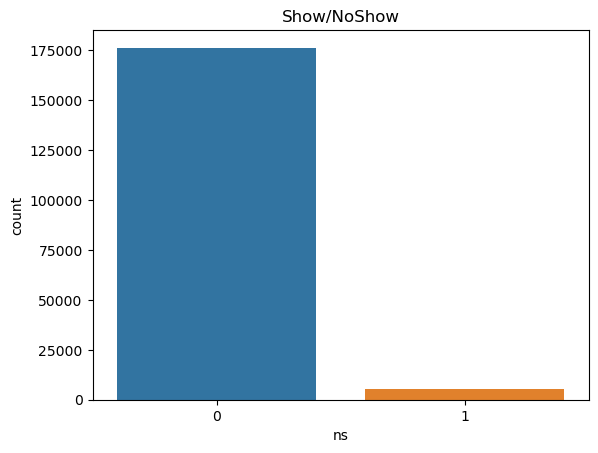

In [85]:
ax = sns.countplot(x=data.ns, data=data)
ax.set_title("Show/NoShow")
plt.show()

Around 3% no show rate - there is a huge class imbalance and we will need to use SMOTE method to do predictive modelling.

In [86]:
correlation = data.corr()['ns'].sort_values()
print(correlation)

is_exclusive_lead              -0.058140
service_delivery_rate_1month   -0.044267
delivered_lead_6month          -0.043030
service_delivery_rate_3month   -0.042750
delivered_lead_3month          -0.042160
                                  ...   
ns_count_6month                 0.045055
ns_count_1week                  0.048157
ns_count_1month                 0.051504
ns                              1.000000
number_times_blocked_in_1day         NaN
Name: ns, Length: 73, dtype: float64


No linear relationship with the target variable(low correlation values b/w -0.06 and 0.05), aand we chedck why #number_times_blocked_in_1day is NaN.

In [87]:
column_description = data['number_times_blocked_in_1day'].describe()
print(column_description)

count    181859.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: number_times_blocked_in_1day, dtype: float64


We can drop this column because all values are zero.

We have some features in dataset which are a combination of two or more features, we will use queries and graphs to verify.

In [105]:
(data1['paf_count_1day'] + data1['delivered_lead_1day'] == data['responded_lead_1day']).all()

True

In [89]:
data['Acceptance_Rate_1DAY'].head(10)

0    3.000000
1    2.500000
2    1.000000
3    1.000000
4    1.000000
5    3.500000
6    2.000000
7    1.516917
8    1.250000
9    1.666667
Name: Acceptance_Rate_1DAY, dtype: float64

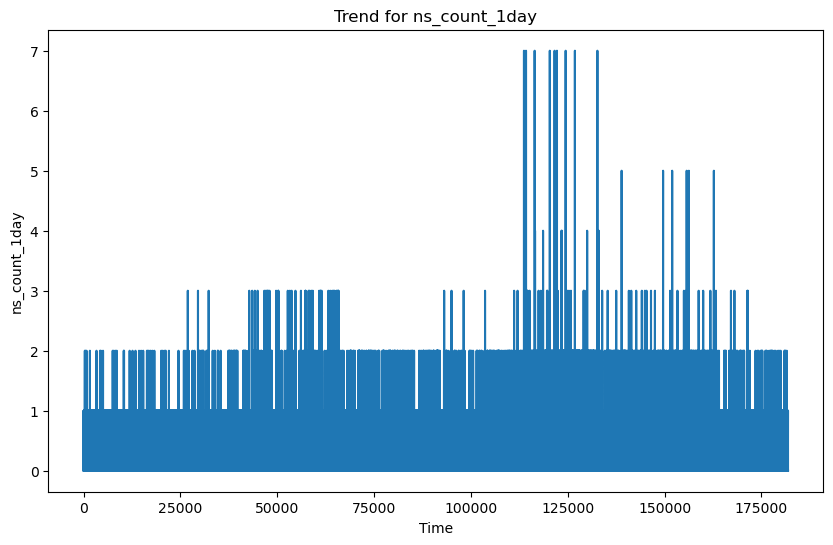

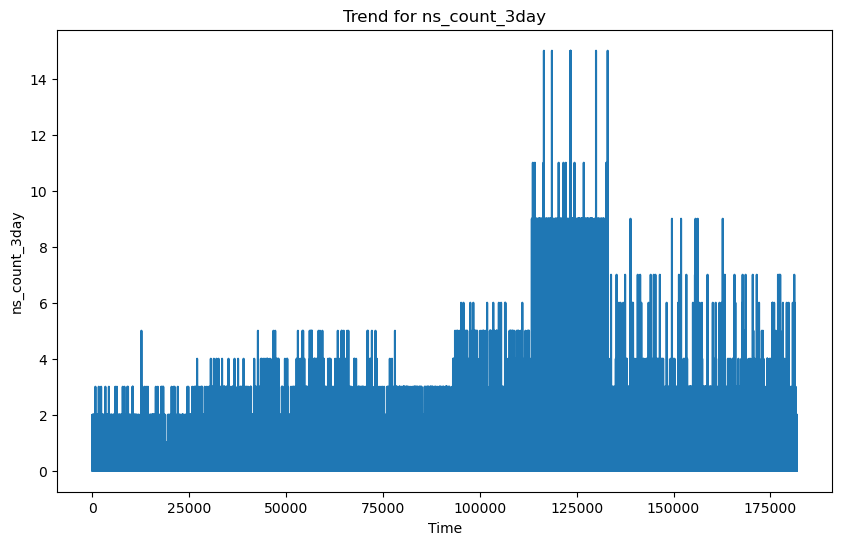

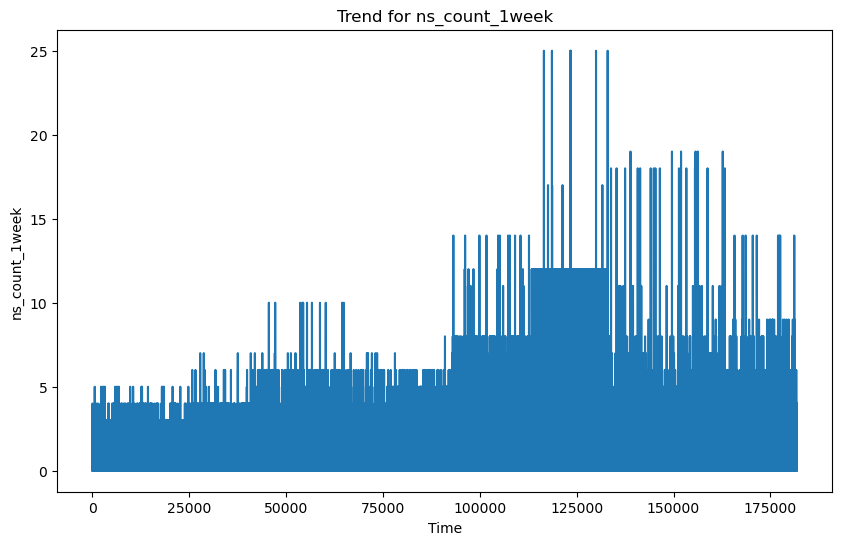

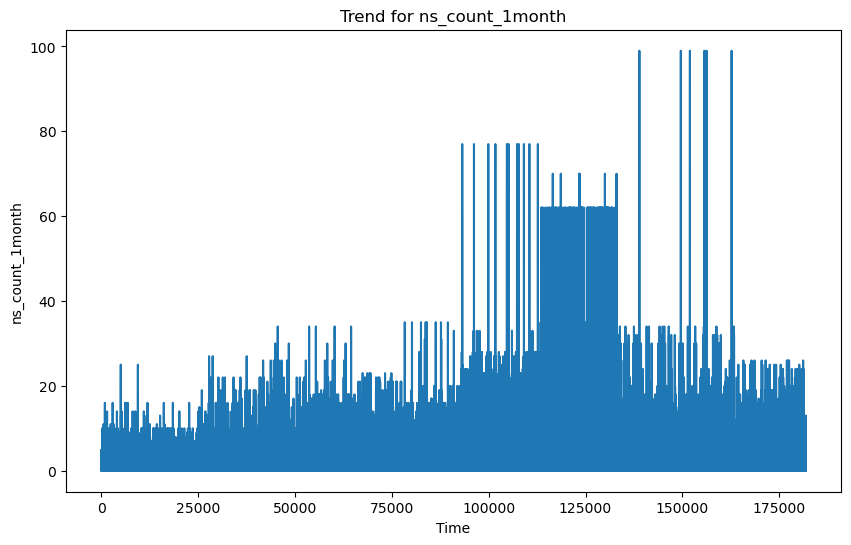

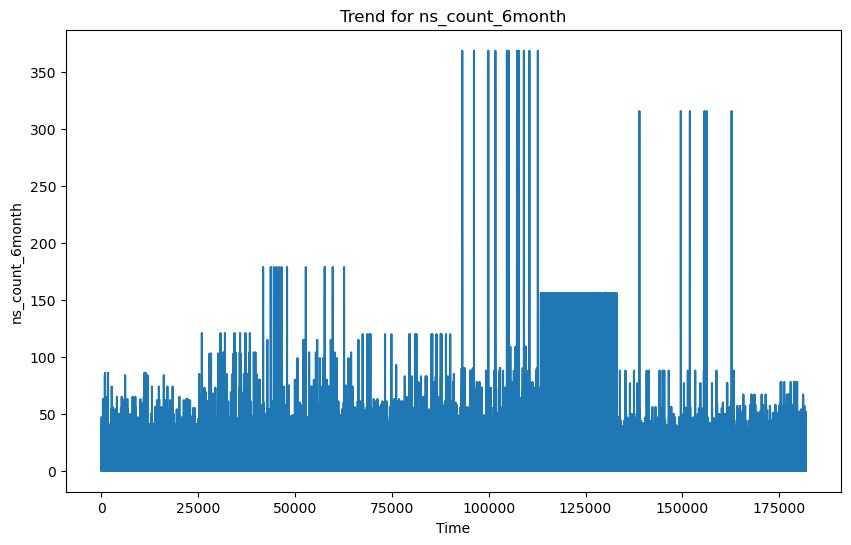

In [90]:
columns = ['ns_count_1day', 'ns_count_3day', 'ns_count_1week', 'ns_count_1month', 'ns_count_6month']

for col in columns:
    plt.figure(figsize=(10,6))
    plt.plot(data[col])
    plt.title(f'Trend for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()

In [91]:
column_name = 'provider_id'
unique_elements_count = data1[column_name].nunique()

print(f"Count of unique elements in '{column_name}': {unique_elements_count}")

Count of unique elements in 'provider_id': 17065


There are 17065 different providers

In [92]:
no_show_counts = data1.groupby('provider_id')['ns'].sum()
print(no_show_counts.max())

12


Model

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
X_features = data.drop(['ns'], axis=1)
y = data['ns']

In [95]:
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_res)
X_test_normalized = scaler.transform(X_test)      #normalizing data to account for outliers before training.

In [101]:
model = xgb.XGBClassifier(random_state=42, learning_rate = 0.05, n_estimators = 100)
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [102]:
y_pred_proba = model.predict_proba(X_test)

In [103]:
costs = np.array([[0, -150], [-200, 400]])
best_thresh = None
best_score = float('-inf')

In [104]:
for thresh in np.linspace(0, 1, 100):
    y_pred = (y_pred_proba[:, 1] > thresh).astype(int)
    score = (costs * confusion_matrix(y_test, y_pred)).sum()
    if score > best_score:
        best_thresh = thresh
        best_score = score

print(f'Best threshold: {best_thresh}')

Best threshold: 0.7474747474747475


0.93 maximizes the expected benefit given the costs provided. 
This means that it is only predicting a no-show when the model is extremely certain. 
Makes sense given the high cost of incorrectly predicting a no-show.